### Homework 1
## Roberto Lucchesi - 1744941

# Introduction
This homework focus on attitude dynamics and control of a spacecraft, modeled as a rigid body, with wheels and dampers. 

The physical properties of the spacecraft are:

- $M_{sp}$ = 200 kg
- $S_{sp}$ = $\begin{bmatrix}  0 \\ 0 \\ 0 \end{bmatrix}$
- $I_{sp}$ = $\begin{bmatrix} 350 & 0 & 0 \\ 0 & 200 & 0 \\ 0 & 0 & 500 \end{bmatrix} $ kg $m^2$

The wheel, mounted at $b_w$ = $\begin{bmatrix}  0.5 & 0 & 0 \end{bmatrix}$ with the axis along the b1 = $\begin{bmatrix}  1 & 0 & 0 \end{bmatrix}$ body unity versor, has:
- $M_w$ = 20 kg
- $S_w$ = $\begin{bmatrix}  10 & 0 & 0 \end{bmatrix}$
- $I_w$ = $\begin{bmatrix} 10 & 0 & 0 \\ 0 & 10 & 0 \\ 0 & 0 & 10 \end{bmatrix} $ kg $m^2$


Four dampers, with:
- $M_d$ = 5 kg
- Kd = 3 kg*$s^{(-2)}$
- Cd = 5 kg*$s^{(-1)}$

with respective axis $n1$ = $\begin{bmatrix}  0 & 0 & 1 \end{bmatrix}$  $n2$ = $\begin{bmatrix}  0 & -1 & 0 \end{bmatrix}$ $n3$ = $\begin{bmatrix}  0 & 0 & -1 \end{bmatrix}$  $n4$ = $\begin{bmatrix}  0 & 1 & 0 \end{bmatrix}$ 
and positions at rest $b_i$ = b*$n_i$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi   # for ODE integration


#from utils import *


from toolbox.bodies import *

In [2]:
# Define body frame unit vectors
b1 = np.array([[1], [0], [0]])
b2 = np.array([[0], [1], [0]])
b3 = np.array([[0], [0], [1]])

b = 0.5 # absolute distance from center of mass to rotor and dampers

Fext = np.array([[0], [0], [0]]) # external force
Mext = np.array([[0], [0], [0]]) # external moment

In [3]:
# Define the spacecraft parameters
Msp = 200.0 # kg
Jsp = np.array([[350.0, 0, 0], [0, 200.0, 0], [0, 0, 500.0]]) # kg*m^2

# Create the spacecraft object
sp = Craft(Msp, Jsp)


In [4]:
# Define device list
devices = []

In [5]:
# Define wheel parameters
Mw = 20 # kg
Rw = 1 # m
b_w = b*b1 # m, position of wheel from center of mass
a_w = b1 # wheel axis direction


### Da capire come impostare lo stato inizale (anche di damper)
om_s01 = 2*np.pi # rad/s
om_s02 = 3*np.pi # rad/s
Kw = 0.1 # Nm/rad/s

# Create the wheel objects
devices.append(Wheel(Mw, b_w, a_w, Rw))


In [6]:
# Define damper parameters
Md = 5 # kg
Kd = 3 # Kg/s^2
Cd = 5 # Kg/s

# Damper positions and directions
b_d1 = b*b3
a_d1 = b3

b_d2 = -b*b2
a_d2 = -b2

b_d3 = -b*b3
a_d3 = -b3

b_d4 = b*b2
a_d4 = b2

b_ds = [b_d1, b_d2, b_d3, b_d4]
a_ds = [a_d1, a_d2, a_d3, a_d4]

In [7]:
# Add dampers to devices 
positions = [b_d1, b_d2, b_d3, b_d4]
axis = [a_d1, a_d2, a_d3, a_d4]

for i in range(4):
    devices.append(Damper(Md,positions[i], axis[i], Kd, Cd))


In [8]:
# Add the devices to the spacecraft
sp.add_devices(devices)

In [9]:
# Initial conditions for the spacecraft
vp0 = np.array([[0], [0], [0]]) # initial velocity of the spacecraft
om0 =  np.array([[np.deg2rad(36)], [np.deg2rad(3)], [np.deg2rad(3)]]) # initial angular velocity of the spacecraft radians/sec

In [10]:
t0 = 0
tf1 = 1800 # seconds, 30 minutes
tf2 = 600 # seconds, 10 minutes

# Case a): Locked wheel

In [11]:
nu0 = np.concatenate((vp0, om0, np.zeros((4,1)), np.array([[om_s01]]), np.zeros((4,1)))) # [vP, om, chi_dot, om_s, chi]
nu0 = nu0.flatten()
# Initialize the spacecraft
sp.initialize(nu0[-4:]) # Pass only chi0 to initialize the spacecraft

# Lock all wheels in the spacecraft
sp.lock_wheels()

In [12]:
sp.simulate(nu0, (t0, tf1))

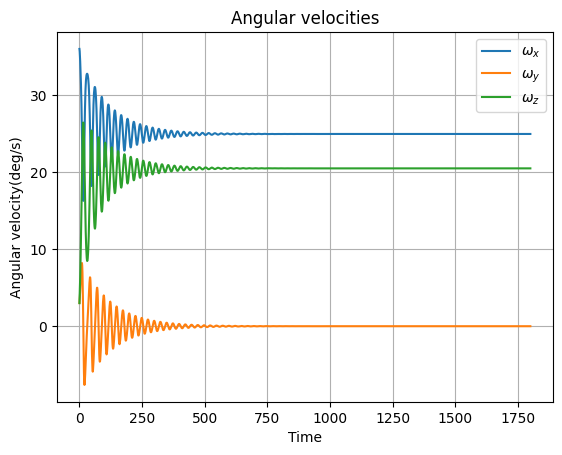

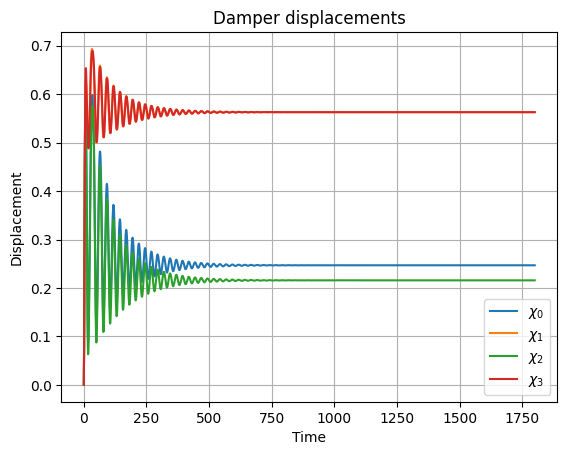

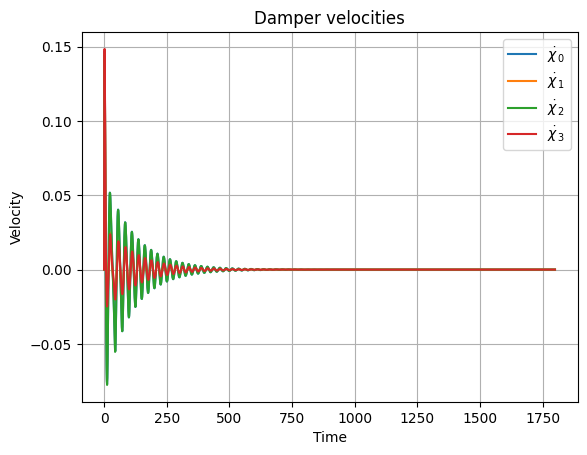

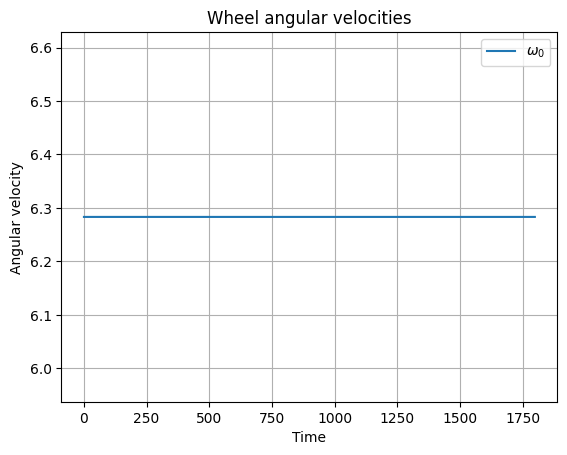

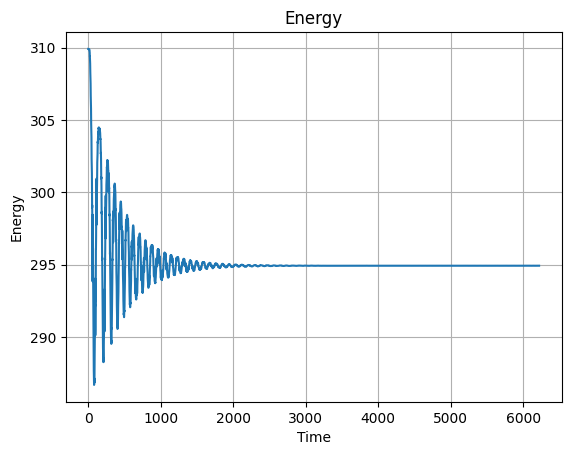

In [13]:
sp.plot()

# Case b) Viscous wheel

In [14]:
def wheel_control(t, nu):
    # Control law for the wheel
    # nu = [vP, om, chi_dot, om_s]
    
    return -Kw*nu[-1]
nu0 = np.concatenate((vp0, om0, np.zeros((4,1)), np.array([[om_s02]]), np.zeros((4,1)))) # [vP, om, chi_dot, om_s, chi]
nu0 = nu0.flatten()
sp.initialize(nu0[-4:]) # Pass only chi0 to initialize the spacecraft
sp.wheels[0].set_lock(False)
sp.wheels[0].set_control(wheel_control)



In [15]:
sp.simulate(nu0, (t0, tf2))

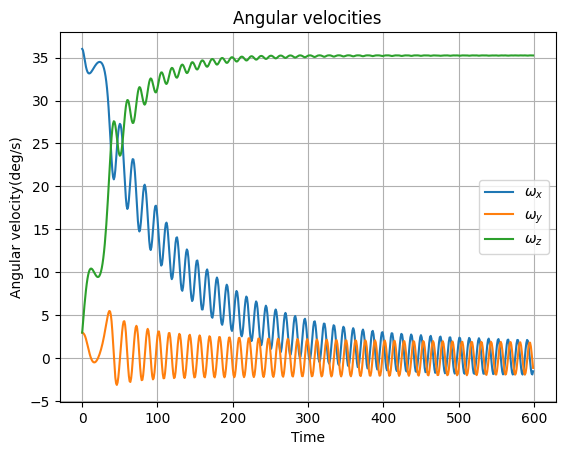

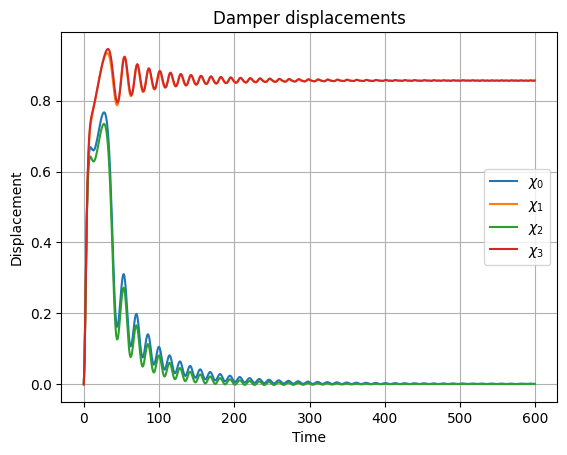

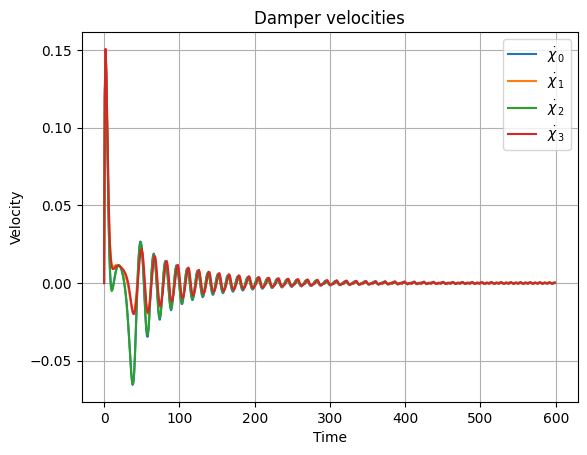

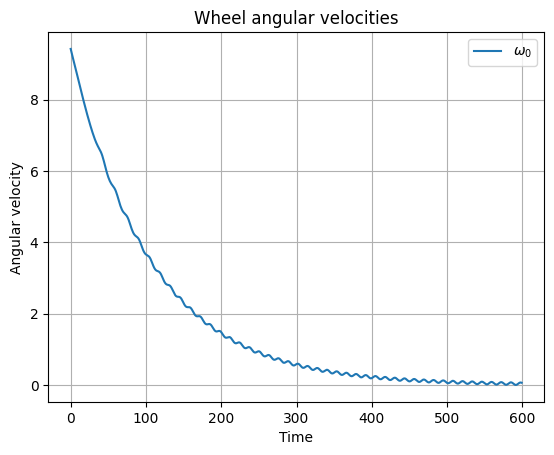

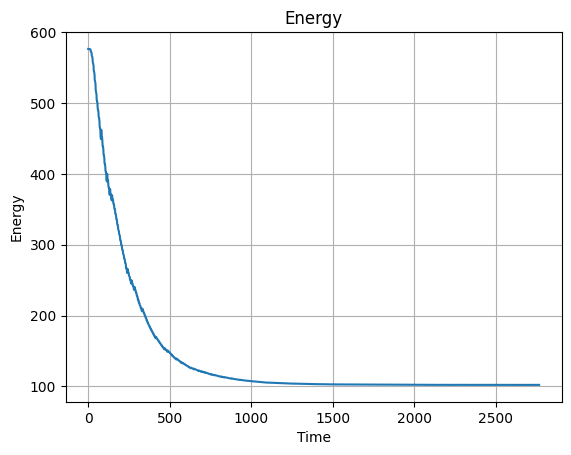

In [16]:
sp.plot()

# Case c) Unlocked wheel

In [17]:
# case c): wheel unlocked -- zero control

ga_control = lambda t, x: 0 # control function

nu0 = np.concatenate((vp0, om0, np.zeros((4,1)), np.array([[om_s01]]), np.zeros((4,1)))) # [vP, om, chi_dot, om_s, chi]
nu0 = nu0.flatten()

sp.initialize(nu0[-4:]) # Pass only chi0 to initialize the spacecraft
sp.wheels[0].set_lock(False)
sp.wheels[0].set_control(ga_control)


In [18]:
sp.simulate(nu0, (t0, tf1))

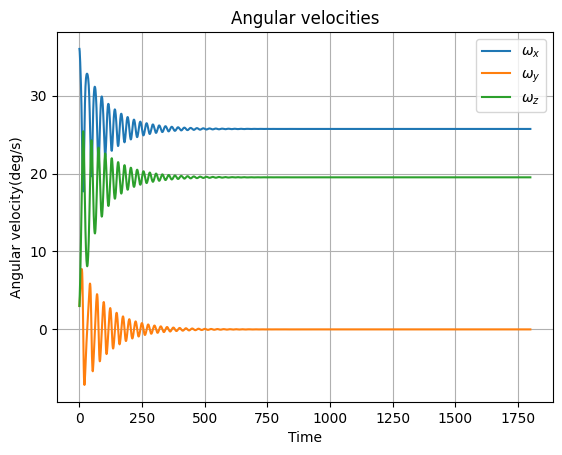

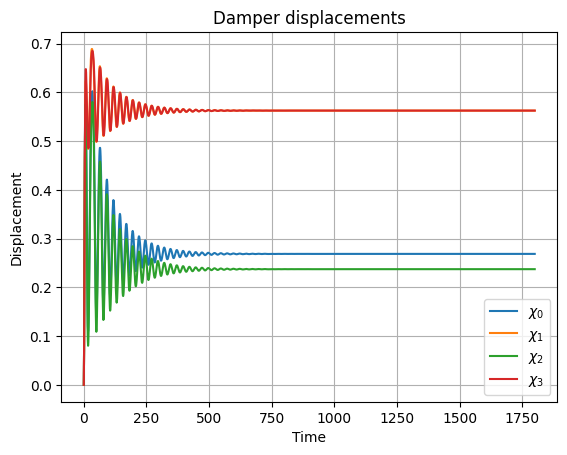

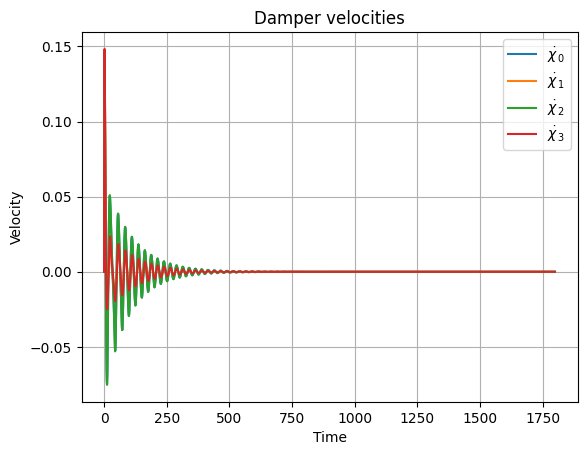

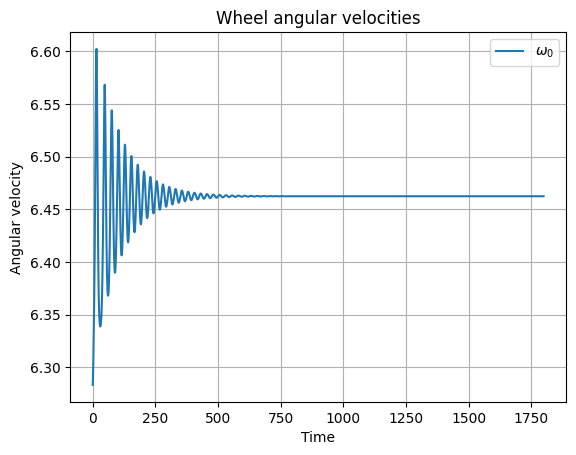

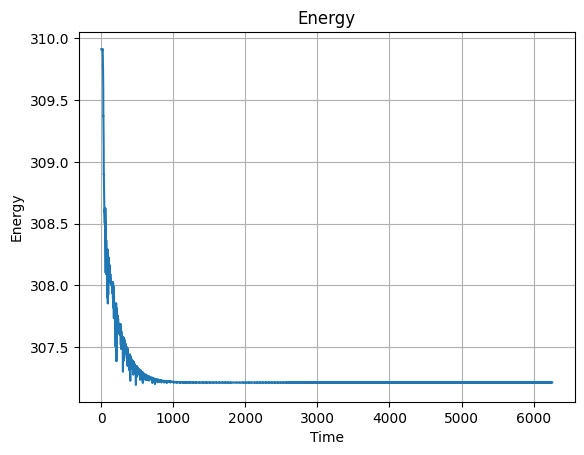

In [19]:
sp.plot()